In [1]:
from numpy import *
import pandas as pd
import sympy as sm
import matplotlib.pyplot as plt

## T 1

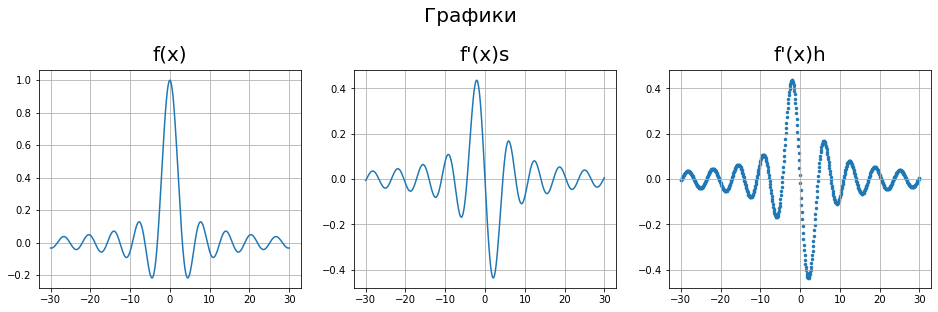

             x                 f(x)                 f'(x)s  \
0   -30.000000  -0.0329343874697621   -0.00623952791191154   
1   -29.899833  -0.0333949748330068   -0.00294551954842241   
2   -29.799666  -0.0335227476095359   0.000400195445859219   
3   -29.699499  -0.0333141822458971    0.00376446214212722   
4   -29.599332  -0.0327690993726495    0.00711371814726626   
..         ...                  ...                    ...   
595  29.599332  -0.0327690993726495   -0.00711371814726626   
596  29.699499  -0.0333141822458971   -0.00376446214212710   
597  29.799666  -0.0335227476095359  -0.000400195445859100   
598  29.899833  -0.0333949748330068    0.00294551954842241   
599  30.000000  -0.0329343874697621    0.00623952791191154   

                    f'(x)h  
0     -0.00622554735152638  
1     -0.00293692639294772  
2     0.000403279369815476  
3      0.00376196911547763  
4      0.00710563558861704  
..                     ...  
595   -0.00710563558861704  
596   -0.00376196911547

In [135]:
def task1(f, left, right, num_of_dots, dx):
    
    # ==========Задали функции==============
    
    x, y = sm.symbols('x y')
    
    func = sm.parse_expr(f)
    
    func_d = sm.diff(func)
    
    
    # =====Формула рассчета производной=====
    
    func_d_hands = lambda x1, dx: (func.evalf(subs={x:x1 + dx}) - func.evalf(subs={x:x1 - dx}))/(2*dx)
    
    # =======Определение интервала==========
    left_b = eval(str(left))
    right_b = eval(str(right))
    num = int(eval(str(num_of_dots))//1)
                                              
    x1 = list(linspace(left_b, right_b, num = num))
    
                                              
    # ==========Подсчет значений============
                                              
    y_f = []
    y_df1 = []
    y_df2 = []
    helpi = [] 
    for i in x1:
        try:
            a = func.evalf(subs={x:i})
            b = func_d.evalf(subs={x:i})
            c = func_d_hands(i, dx)
            y_f.append(a)
            y_df1.append(b)
            y_df2.append(c)
        except:
            helpi.append(i)
    
    for h in helpi:
        x1.remove(h)
    
    # ========Создание ДатаФрейма============
    
    df = pd.DataFrame({'x': x1, "f(x)": y_f, "f'(x)s": y_df1, "f'(x)h": y_df2})
    
    # ==========Построение графика============
    fig, axes = plt.subplots(1, 3)

    
    axes[0].plot(df['x'],df['f(x)'])
    axes[1].plot(df['x'],df["f'(x)s"])
    axes[2].scatter(df['x'],df["f'(x)h"],marker ='.',linewidths=0.5)


    axes[0].set_title("f(x)",
                    loc = 'center',
                    pad = 10,
                    fontsize = 20)    

    axes[1].set_title("f'(x)s",
                    loc = 'center',     
                    pad = 10,
                    fontsize = 20)

    axes[2].set_title("f'(x)h",
                    loc = 'center',
                    pad = 10,
                    fontsize = 20)


    for ax in axes:
        ax.grid(axis = 'both')

    fig.suptitle('Графики',
                    fontsize = 20,
                    y = 1.1)

    fig.set_figheight(4)
    fig.set_figwidth(16)

    plt.show()
    
    print(df)

df = task1('sin(x)/x', -30, 30, 600, 0.1)

# T 2

S =  -0.00867912214450914


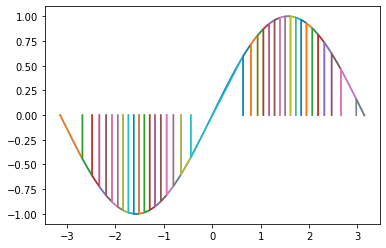

In [145]:
def task2(f, left, right):
    
    # ==========Задали функции==============
    
    x, y = sm.symbols('x y')
    
    func = sm.parse_expr(f)
    
    func_d = sm.diff(func)
    
    left_b = eval(str(left))
    right_b = eval(str(right))
    
    
    
    # constconstconstconstconstconstconstconst
    
    min_step = 0.01
    
    left_tr = left
    der_l = func_d.evalf(subs={x:left_tr})
    
    right_tr = left_tr + min_step
    
    
    square = 0
    list_of_tr = []
    
    # constconstconstconstconstconstconstconst
    
    
    
    while not(right_tr >= right_b):
        
        der_r = func_d.evalf(subs={x:right_tr})
        
        if abs(der_l - der_r) >= 0.1:
            
            list_of_tr.append([left_tr,func.evalf(subs={x:left_tr}),right_tr,func.evalf(subs={x:right_tr})])
            
            left_tr = right_tr
            right_tr = left_tr + min_step
            der_l =func_d.evalf(subs={x:left_tr})
            
        else:
            right_tr += min_step
            if right_tr >= right_b:
                list_of_tr.append([left_tr,func.evalf(subs={x:left_tr}),right_tr,func.evalf(subs={x:right_tr})])
         
    
#     =========== Построение графиков =============
    x_spl = linspace(left_b, right_b, int((abs(left_b-right_b)*100)//1))
    y = []
    
    for i in x_spl:
        y.append(func.evalf(subs={x:i}))
    
    
    fig, ax = plt.subplots()
    
    ax.plot(x_spl, y)
    
    for s in list_of_tr:
        ax.plot([s[0],s[0],s[2],s[2]],[0,s[1], s[3],0])
        square += (abs((s[0]-s[2]))*(s[1]+s[3]))/2
    
    print('S = ', square)
                     
            
        
task2('sin(x)', -pi, pi) 

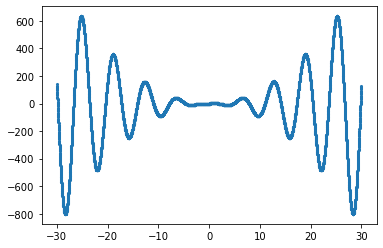

In [120]:
def antiderivative(f, left, right):
    
    x, y = sm.symbols('x y')
    
    func = sm.parse_expr(f)
    
    left_b = eval(str(left))
    right_b = eval(str(right))
    
    num_of_dots= (abs(left_b-right_b)*100)//1
    
    linsp_of_dots = linspace(left_b, right_b, num = num_of_dots)

       
    func_d_hands = lambda x1: (func.evalf(subs={x:x1 + 0.0001}) - func.evalf(subs={x:x1 - 0.0001}))/(2*0.0001)
    
    x1 = []
    y1 = []
    for k,i in enumerate(linsp_of_dots[:-1]):
        
        
        tangent = lambda x1: func.evalf(subs={x: i})+ func_d_hands(i)*(x1*i)
        
        y1.append(tangent(linsp_of_dots[k+1]))
        x1.append(linsp_of_dots[k+1])    

    plt.scatter(x1,y1,marker ='.',linewidths=0.1)

    
antiderivative('sin(x)', -30, 30)

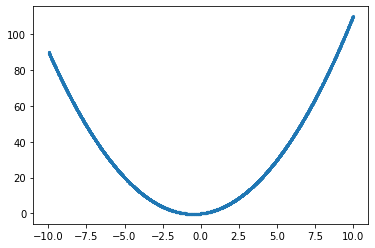

In [118]:
antiderivative('x', -10, 10)

In [ ]:
def antiderivative_V2(f, left, right):
        
    x, y = sm.symbols('x y')
    
    func = sm.parse_expr(f)
    
    left_b = eval(str(left))
    right_b = eval(str(right))
    
    